In [3]:
from data_preprocessing import *
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.python.keras.optimizers import TFOptimizer


In [4]:
# rehaping all arrays for training and testing
trainX = np.array(X_train_prep).reshape(X_train_prep.shape[0], X_train_prep.shape[1])
trainY = np.array(y_train).reshape(-1,1)
testX = np.array(X_test_prep).reshape(X_test_prep.shape[0], X_test_prep.shape[1])
testY = np.array(y_test).reshape(-1,1)

In [5]:
# apply minmaxscaler method on training output and testing output
scaler = MinMaxScaler(feature_range=(0, 1))
trainY = scaler.fit_transform(trainY)
testY = scaler.fit_transform(testY)

In [6]:
# build nueral network model to predict electricity load
model = Sequential()
model.add(Dense(93, input_dim=93, kernel_initializer='normal', activation='sigmoid'))
model.add(Dense(120, kernel_initializer='normal'))
model.add(Dense(120, kernel_initializer='normal'))
model.add(Dense(120, kernel_initializer='normal'))
model.add(Dense(120, kernel_initializer='normal'))
model.add(Dense(1, kernel_initializer='normal'))

# Compile model
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 93)                8742      
_________________________________________________________________
dense_1 (Dense)              (None, 120)               11280     
_________________________________________________________________
dense_2 (Dense)              (None, 120)               14520     
_________________________________________________________________
dense_3 (Dense)              (None, 120)               14520     
_________________________________________________________________
dense_4 (Dense)              (None, 120)               14520     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 121       
Tota

In [7]:
# training model
model.fit(trainX, trainY, epochs=100, validation_split=0.2, batch_size=50)

Train on 28588 samples, validate on 7148 samples
Epoch 1/100
28588/28588 [==============================] - 5s 173us/sample - loss: 0.0092 - val_loss: 0.0042
Epoch 2/100
28588/28588 [==============================] - 4s 131us/sample - loss: 0.0036 - val_loss: 0.0030
Epoch 3/100
28588/28588 [==============================] - 4s 147us/sample - loss: 0.0029 - val_loss: 0.0038
Epoch 4/100
28588/28588 [==============================] - 4s 130us/sample - loss: 0.0024 - val_loss: 0.0032
Epoch 5/100
28588/28588 [==============================] - 4s 145us/sample - loss: 0.0022 - val_loss: 0.0024
Epoch 6/100
28588/28588 [==============================] - 4s 154us/sample - loss: 0.0021 - val_loss: 0.0022
Epoch 7/100
28588/28588 [==============================] - 4s 132us/sample - loss: 0.0019 - val_loss: 0.0023
Epoch 8/100
28588/28588 [==============================] - 4s 134us/sample - loss: 0.0018 - val_loss: 0.0028
Epoch 9/100
28588/28588 [==============================] - 4s 133us/sample - lo

In [8]:
# predicting
pred = model.predict(testX, verbose=1)
testY=testY.flatten()
test_output=pred.flatten()

8688/8688 [==============================] - 1s 60us/sample


In [11]:
# show the first 10 actual and predict values
for item in range(10):
    value = "actual_value number{} is: {} and predict_value number{} is {}".format(item,testY[item],item,test_output[item])
    print(value)

actual_value number0 is: 0.3699532153546625 and predict_value number0 is 0.36330699920654297
actual_value number1 is: 0.3622933193851161 and predict_value number1 is 0.3515838384628296
actual_value number2 is: 0.36407171708366026 and predict_value number2 is 0.36311620473861694
actual_value number3 is: 0.4014006334815332 and predict_value number3 is 0.40064701437950134
actual_value number4 is: 0.49308110307151365 and predict_value number4 is 0.48399806022644043
actual_value number5 is: 0.6769244180978118 and predict_value number5 is 0.6805660724639893
actual_value number6 is: 0.8447040362653648 and predict_value number6 is 0.8056408166885376
actual_value number7 is: 0.8837939150902274 and predict_value number7 is 0.8654544353485107
actual_value number8 is: 0.8955917821753407 and predict_value number8 is 0.8827069997787476
actual_value number9 is: 0.8977130735477872 and predict_value number9 is 0.894323468208313


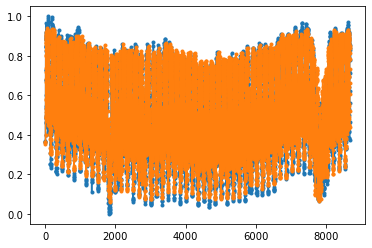

In [48]:
#ploting all acutal and predicted values
plt.plot(testY, label='Actual power', marker='.') 
plt.plot(test_output, label='Predicted power', marker='.')
plt.show()

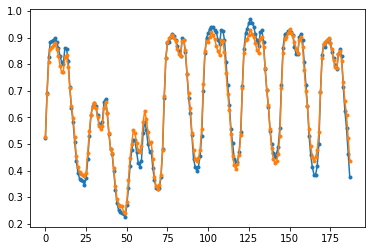

In [16]:
#ploting the last 188 values from acutal and predicted values   
plt.plot(testY[8500:], label='Actual power', marker='.') 
plt.plot(test_output[8500:], label='Predicted power', marker='.')
plt.show()

In [49]:
# calculate errors and show them
mse=mean_squared_error(testY, test_output)
mae=mean_absolute_error(testY, test_output)
print('mse', mse)
print('mae', mae)


mse 0.0017459435882631667
mae 0.02956208405630047


In [19]:
# saving model
model.save("models//neural_network_model.h5")